### Deep Face Architecture
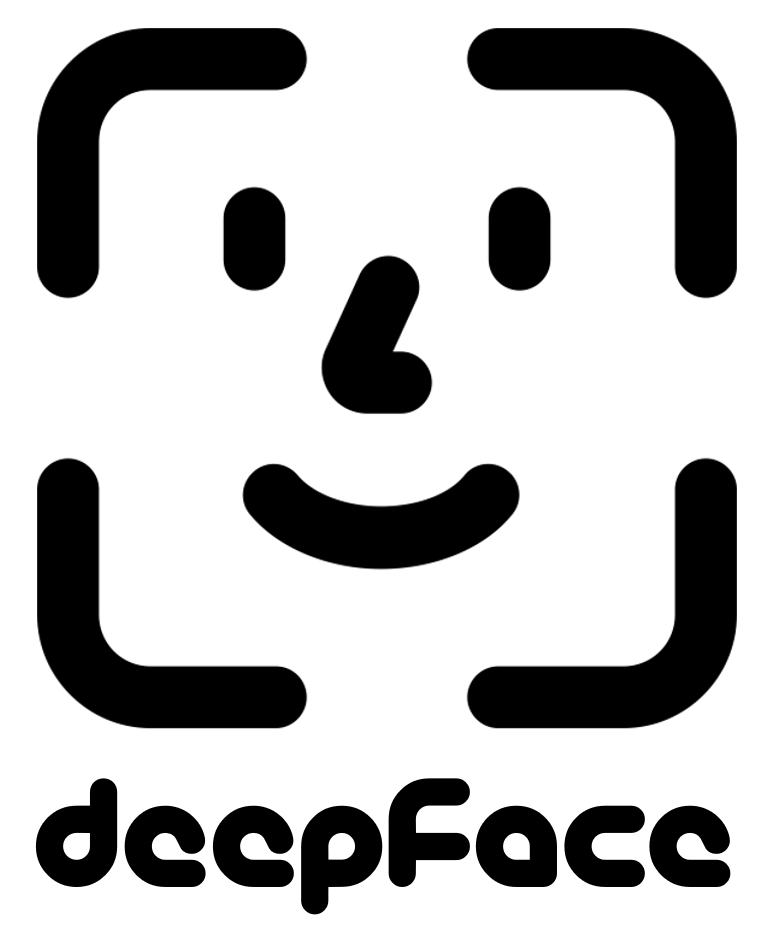

Deep Face is a facial recognition library used for detecting features like Age,Gender,Race and Emotion wrapping the state of the art like VGG-Face,Googel Facenet,Openface and many others

This library is build on the top of tensorflow and Keras and easy to install using pip command.

**pip install deepface**

Learn more on DeepFace:
* https://pypi.org/project/deepface/

### Introduction

This note book will cover the 2 aspects of deepface library.
1. Identifying Gender
2. Identifying Age and bucketing them. Deepface predicts the numerical age. Usually discrete age prediction is difficult to verify and hence we will project the age groups rather.

### Import Required Libraries

In [1]:
!pip install deepface

In [2]:
import re
import traceback
from deepface import DeepFace
import random 
random.seed(3)
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import matplotlib.image as mpimg
import os
import glob
import pandas as pd
import numpy as np

In [10]:
os.getcwd()


'd:\\Kaggle\\Age-and-Gender-Prediction-DeepFace-FaceNet'

In [27]:
## Total images in the folder
img_len=len(glob.glob('./Humans/*'))

In [28]:
print(img_len)
## 7219 total images

7219


### Define a function for Age and Gender Prediction
#### Deepface uses separate pretrained weight for Age and Gender. Define the objective in the action argument of DeepFace.analyze() methos

In [29]:
## Get the gender from the loop
## The functio iterates over the images and uses the deepface age and gender pre trained weights to predict the age and gender.
## Dict is storing Gender,Age and agebucket with key as image name
def calculate_gender(image,img_name):
    name={}
    gender=[]
    age=[]
    agebucket=[]
    try:
        img_arr=cv2.imread(image)
        ## get gender
        response=DeepFace.analyze(img_arr,actions=["gender","age"],enforce_detection=False)
        gender.append(response['gender'])
        age.append(response['age'])
        ## Bucket the age
        if int(age[0])>=13 and int(age[0])<=17:
            agebucket.append('13-17years')
        elif int(age[0])>17 and int(age[0])<=24:
            agebucket.append('18-24years')
        elif int(age[0])>24 and int(age[0])<=34:
            agebucket.append('25-34years')
        elif int(age[0])>34 and int(age[0])<=44:
            agebucket.append('35-44years')
        elif int(age[0])>44 and int(age[0])<=54:
            agebucket.append('45-54years')
        elif int(age[0])>54 and int(age[0])<=64:
            agebucket.append('55-64years')
        elif int(age[0])>64:
            agebucket.append('above 65years')
        else:
            agebucket.append('NA')
        ## store in dictionary
        name[img_name]=(gender[0],age[0],agebucket[0])
    except:
        name[img_name]='NA' ## If the image is not a front facing image
        traceback.print_exc()
    return name

### Iterate through the sample images to predict the gender and age

In [31]:
## Iterate through the image to calculate the gender: Pick only 50 
count=0
img_list=[]
for i in range(img_len):
    image=glob.glob("./Humans/*")[i]
    print(str(image[7:]))
    count+=1
    img_list.append(calculate_gender(image,str(glob.glob("./Humans/*")[i][7:])))
    if count<500:
        continue
    else:
        break

s\1 (1).jpeg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.54it/s]   

1/1 [==============================] - 0s 212ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]


s\1 (1).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 189ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.09it/s]   

1/1 [==============================] - 0s 189ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


s\1 (1).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 214ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.07it/s]   

1/1 [==============================] - 0s 246ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


s\1 (10).jpeg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.07it/s]   

1/1 [==============================] - 0s 199ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


s\1 (10).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.90it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]


s\1 (10).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.01it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


s\1 (100).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 194ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.84it/s]   

1/1 [==============================] - 0s 190ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


s\1 (100).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 188ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  4.08it/s]   

1/1 [==============================] - 0s 195ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]


s\1 (1000).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 189ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.94it/s]   

1/1 [==============================] - 0s 189ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


s\1 (1001).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 189ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.58it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


s\1 (1002).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 190ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.93it/s]   

1/1 [==============================] - 0s 197ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


s\1 (1003).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 190ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.27it/s]   

1/1 [==============================] - 0s 191ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


s\1 (1004).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 191ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.00it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]


s\1 (1005).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 192ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.83it/s]   

1/1 [==============================] - 0s 194ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]


s\1 (1006).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 185ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.24it/s]   

1/1 [==============================] - 0s 193ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


s\1 (1007).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 192ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.44it/s]   

1/1 [==============================] - 0s 191ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


s\1 (1008).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 191ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.19it/s]   

1/1 [==============================] - 0s 219ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]


s\1 (1009).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 191ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.29it/s]   

1/1 [==============================] - 0s 191ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]


s\1 (101).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 191ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.06it/s]   

1/1 [==============================] - 0s 198ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


s\1 (101).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 217ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.94it/s]   

1/1 [==============================] - 0s 191ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


s\1 (1010).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 190ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.08it/s]   

1/1 [==============================] - 0s 190ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


s\1 (1011).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 192ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.82it/s]   

1/1 [==============================] - 0s 198ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


s\1 (1012).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.91it/s]   

1/1 [==============================] - 0s 221ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


s\1 (1013).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.02s/it]   

1/1 [==============================] - 0s 234ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


s\1 (1014).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 216ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.92it/s]   

1/1 [==============================] - 0s 232ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


s\1 (1015).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.67s/it]   

1/1 [==============================] - 0s 215ms/step


Action: age: 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]


s\1 (1016).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.02it/s]   

1/1 [==============================] - 0s 212ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]


s\1 (1017).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 206ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.48it/s]   

1/1 [==============================] - 0s 215ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


s\1 (1018).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.58it/s]   

1/1 [==============================] - 0s 212ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]


s\1 (1019).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 193ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.09it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


s\1 (102).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 214ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.81it/s]   

1/1 [==============================] - 0s 217ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


s\1 (102).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 196ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.18it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


s\1 (1020).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.35it/s]   

1/1 [==============================] - 0s 236ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]


s\1 (1021).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 217ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.34it/s]   

1/1 [==============================] - 0s 216ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


s\1 (1022).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.48it/s]   

1/1 [==============================] - 0s 211ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


s\1 (1023).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 224ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.18it/s]   

1/1 [==============================] - 0s 215ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


s\1 (1024).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.89it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


s\1 (1025).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.40it/s]   

1/1 [==============================] - 0s 212ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


s\1 (1026).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.96it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]


s\1 (1027).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.33it/s]   

1/1 [==============================] - 0s 215ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]


s\1 (1028).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 209ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.69it/s]   

1/1 [==============================] - 0s 248ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


s\1 (1029).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 196ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.82it/s]   

1/1 [==============================] - 0s 223ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


s\1 (103).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.75it/s]   

1/1 [==============================] - 0s 213ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


s\1 (103).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.96it/s]   

1/1 [==============================] - 0s 211ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


s\1 (1030).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 195ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.61it/s]   

1/1 [==============================] - 0s 208ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


s\1 (1031).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 216ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.74it/s]   

1/1 [==============================] - 0s 268ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


s\1 (1032).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 195ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.48it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


s\1 (1033).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.17it/s]   

1/1 [==============================] - 0s 217ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


s\1 (1034).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 220ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.59it/s]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


s\1 (1035).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 210ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.63it/s]   

1/1 [==============================] - 0s 216ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


s\1 (1036).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 196ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.36it/s]   

1/1 [==============================] - 0s 221ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


s\1 (1037).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 248ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.28it/s]   

1/1 [==============================] - 0s 225ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


s\1 (1038).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.21it/s]   

1/1 [==============================] - 0s 215ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


s\1 (1039).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.18it/s]   

1/1 [==============================] - 0s 217ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


s\1 (104).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.17it/s]   

1/1 [==============================] - 0s 216ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


s\1 (104).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.70it/s]   

1/1 [==============================] - 0s 221ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


s\1 (1040).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.34s/it]   

1/1 [==============================] - 0s 211ms/step


Action: age: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]


s\1 (1041).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.20it/s]   

1/1 [==============================] - 0s 226ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


s\1 (1042).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 193ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.52it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


s\1 (1043).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 206ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.43it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


s\1 (1044).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.71it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


s\1 (1045).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.86it/s]   

1/1 [==============================] - 0s 220ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


s\1 (1046).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 211ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.50it/s]   

1/1 [==============================] - 0s 225ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


s\1 (1047).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 217ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.72s/it]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]


s\1 (1048).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 193ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.16it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]


s\1 (1049).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 213ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.19it/s]   

1/1 [==============================] - 0s 212ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


s\1 (105).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.92it/s]   

1/1 [==============================] - 0s 215ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


s\1 (105).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.97it/s]   

1/1 [==============================] - 0s 222ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


s\1 (1050).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.45it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


s\1 (1051).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.73it/s]   

1/1 [==============================] - 0s 213ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


s\1 (1052).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.06it/s]   

1/1 [==============================] - 0s 219ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]


s\1 (1053).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.55it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]


s\1 (1054).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.28s/it]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]


s\1 (1055).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.71it/s]   

1/1 [==============================] - 0s 216ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


s\1 (1056).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.16it/s]   

1/1 [==============================] - 0s 230ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]


s\1 (1057).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 213ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.48it/s]   

1/1 [==============================] - 0s 212ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


s\1 (1058).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 216ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.47it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


s\1 (1059).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.18it/s]   

1/1 [==============================] - 0s 207ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


s\1 (106).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 211ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.61it/s]   

1/1 [==============================] - 0s 224ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


s\1 (106).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 210ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.40it/s]   

1/1 [==============================] - 0s 225ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


s\1 (1060).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.47it/s]   

1/1 [==============================] - 0s 226ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


s\1 (1061).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.03it/s]   

1/1 [==============================] - 0s 236ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


s\1 (1062).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 209ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.68it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


s\1 (1063).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 195ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.03it/s]   

1/1 [==============================] - 0s 201ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


s\1 (1064).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.33it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


s\1 (1065).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 193ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.48it/s]   

1/1 [==============================] - 0s 201ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


s\1 (1066).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 206ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.96it/s]   

1/1 [==============================] - 0s 212ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


s\1 (1067).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.76it/s]   

1/1 [==============================] - 0s 226ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


s\1 (1068).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.30s/it]   

1/1 [==============================] - 0s 208ms/step


Action: age: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]


s\1 (1069).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.79it/s]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


s\1 (107).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.58it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


s\1 (107).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 192ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.64it/s]   

1/1 [==============================] - 0s 207ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]


s\1 (1070).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 195ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.15it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


s\1 (1071).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 196ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.83it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


s\1 (1072).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 193ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.80it/s]   

1/1 [==============================] - 0s 218ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


s\1 (1073).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 189ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.49it/s]   

1/1 [==============================] - 0s 199ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


s\1 (1074).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 362ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.09s/it]   

1/1 [==============================] - 0s 361ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]


s\1 (1075).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 301ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.09it/s]   

1/1 [==============================] - 0s 322ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


s\1 (1076).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 317ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.34it/s]   

1/1 [==============================] - 0s 339ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]


s\1 (1077).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 277ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.02s/it]   

1/1 [==============================] - 0s 325ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


s\1 (1078).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 259ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.50it/s]   

1/1 [==============================] - 0s 246ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


s\1 (1079).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 233ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.30it/s]   

1/1 [==============================] - 0s 235ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]


s\1 (108).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 221ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.00it/s]   

1/1 [==============================] - 0s 233ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


s\1 (108).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 222ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.62it/s]   

1/1 [==============================] - 0s 252ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


s\1 (1080).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 214ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.46it/s]   

1/1 [==============================] - 0s 213ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


s\1 (1081).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.84it/s]   

1/1 [==============================] - 0s 216ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


s\1 (1082).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 260ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.20it/s]   

1/1 [==============================] - 0s 220ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]


s\1 (1083).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 244ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.14it/s]   

1/1 [==============================] - 0s 207ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


s\1 (1084).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.75it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


s\1 (1085).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 193ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.05it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


s\1 (1086).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 195ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.66it/s]   

1/1 [==============================] - 0s 201ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


s\1 (1087).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 218ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.47s/it]   

1/1 [==============================] - 0s 236ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]


s\1 (1088).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.74it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]


s\1 (1089).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.19it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


s\1 (109).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 193ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.91it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


s\1 (109).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.62it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


s\1 (1090).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.67it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


s\1 (1091).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.51it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


s\1 (1092).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.54it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


s\1 (1093).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 191ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.83it/s]   

1/1 [==============================] - 0s 195ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]


s\1 (1094).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 195ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.32it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


s\1 (1095).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.40it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]


s\1 (1096).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.34it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


s\1 (1097).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 191ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.73it/s]   

1/1 [==============================] - 0s 217ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


s\1 (1098).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.07it/s]   

1/1 [==============================] - 0s 199ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


s\1 (1099).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 193ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.75it/s]   

1/1 [==============================] - 0s 196ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


s\1 (11).jpeg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 193ms/step


Action: age:  50%|█████     | 1/2 [00:02<00:02,  2.23s/it]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


s\1 (11).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.80s/it]   

1/1 [==============================] - 0s 199ms/step


Action: age: 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


s\1 (11).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.15it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


s\1 (110).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 192ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.10it/s]   

1/1 [==============================] - 0s 215ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]


s\1 (110).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.03it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


s\1 (1100).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 195ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.03s/it]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


s\1 (1101).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 220ms/step


Action: age:  50%|█████     | 1/2 [00:02<00:02,  2.07s/it]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


s\1 (1102).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.02it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


s\1 (1103).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.40it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


s\1 (1104).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.98it/s]   

1/1 [==============================] - 0s 218ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


s\1 (1105).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 211ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.99it/s]   

1/1 [==============================] - 0s 211ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


s\1 (1106).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.51it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


s\1 (1107).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.23it/s]   

1/1 [==============================] - 0s 213ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


s\1 (1108).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.24it/s]   

1/1 [==============================] - 0s 199ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


s\1 (1109).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.11s/it]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


s\1 (111).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 211ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.16it/s]   

1/1 [==============================] - 0s 249ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]


s\1 (111).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.43it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


s\1 (1110).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.01it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


s\1 (1111).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.32it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


s\1 (1112).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.96it/s]   

1/1 [==============================] - 0s 199ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]


s\1 (1113).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.92it/s]   

1/1 [==============================] - 0s 208ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


s\1 (1114).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.35it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


s\1 (1115).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.48it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


s\1 (1116).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.44s/it]   

1/1 [==============================] - 0s 196ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]


s\1 (1117).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.59it/s]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


s\1 (1118).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 196ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.19it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]


s\1 (1119).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.54it/s]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


s\1 (112).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 218ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.72it/s]   

1/1 [==============================] - 0s 212ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]


s\1 (112).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.21it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


s\1 (1120).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 195ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.65it/s]   

1/1 [==============================] - 0s 235ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


s\1 (1121).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.04s/it]   

1/1 [==============================] - 0s 199ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


s\1 (1122).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.12it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


s\1 (1123).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 196ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.58it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


s\1 (1124).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.73it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


s\1 (1125).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.14it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


s\1 (1126).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.73it/s]   

1/1 [==============================] - 0s 201ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


s\1 (1127).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 206ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.63it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


s\1 (1128).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.03it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


s\1 (1129).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.91it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]


s\1 (113).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.20it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]


s\1 (113).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.91it/s]   

1/1 [==============================] - 0s 239ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


s\1 (1130).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.25it/s]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]


s\1 (1131).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.10it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


s\1 (1132).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 197ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.96it/s]   

1/1 [==============================] - 0s 221ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


s\1 (1133).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.75it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]


s\1 (1134).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 196ms/step


Action: age:  50%|█████     | 1/2 [00:05<00:05,  5.82s/it]   

1/1 [==============================] - 0s 200ms/step


Action: age: 100%|██████████| 2/2 [00:06<00:00,  3.03s/it]


s\1 (1135).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 218ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.47it/s]   

1/1 [==============================] - 0s 242ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


s\1 (1136).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 209ms/step


Action: age:  50%|█████     | 1/2 [00:06<00:06,  6.56s/it]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:06<00:00,  3.40s/it]


s\1 (1137).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.50it/s]   

1/1 [==============================] - 0s 211ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


s\1 (1138).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.03it/s]   

1/1 [==============================] - 0s 238ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]


s\1 (1139).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.25it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


s\1 (114).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.43it/s]   

1/1 [==============================] - 0s 212ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


s\1 (114).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.99it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


s\1 (1140).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.90it/s]   

1/1 [==============================] - 0s 219ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


s\1 (1141).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.80it/s]   

1/1 [==============================] - 0s 201ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


s\1 (1142).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.49it/s]   

1/1 [==============================] - 0s 237ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


s\1 (1143).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 212ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.24s/it]   

1/1 [==============================] - 0s 221ms/step


Action: age: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]


s\1 (1144).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.31it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


s\1 (1145).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.50it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


s\1 (1146).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.34it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


s\1 (1147).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 209ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.19it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


s\1 (1148).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.41s/it]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]


s\1 (1149).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.36it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


s\1 (115).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.20it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]


s\1 (115).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 213ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.00it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


s\1 (1150).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.01it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


s\1 (1151).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.94it/s]   

1/1 [==============================] - 0s 207ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


s\1 (1152).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.66it/s]   

1/1 [==============================] - 0s 207ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


s\1 (1153).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.07it/s]   

1/1 [==============================] - 0s 208ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]


s\1 (1154).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.67it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


s\1 (1155).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.84it/s]   

1/1 [==============================] - 0s 211ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


s\1 (1156).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.46s/it]   

1/1 [==============================] - 0s 201ms/step


Action: age: 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]


s\1 (1157).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.28it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


s\1 (1158).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.21it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]


s\1 (1159).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.19it/s]   

1/1 [==============================] - 0s 216ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


s\1 (116).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.43it/s]   

1/1 [==============================] - 0s 208ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


s\1 (116).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.93it/s]   

1/1 [==============================] - 0s 201ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]


s\1 (1160).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.36it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


s\1 (1161).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.14it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


s\1 (1162).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.83it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


s\1 (1163).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.82it/s]   

1/1 [==============================] - 0s 215ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


s\1 (1164).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.00it/s]   

1/1 [==============================] - 0s 207ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


s\1 (1165).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.55it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


s\1 (1166).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.04it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


s\1 (1167).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.29it/s]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


s\1 (1168).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.09s/it]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]


s\1 (1169).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 199ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.42it/s]   

1/1 [==============================] - 0s 211ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


s\1 (117).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.89it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


s\1 (117).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.62it/s]   

1/1 [==============================] - 0s 208ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]


s\1 (1170).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.54it/s]   

1/1 [==============================] - 0s 237ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


s\1 (1171).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 217ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.80it/s]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


s\1 (1172).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.01it/s]   

1/1 [==============================] - 0s 201ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]


s\1 (1173).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.99it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]


s\1 (1174).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 219ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.35it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


s\1 (1175).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.33it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]


s\1 (1176).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.25it/s]   

1/1 [==============================] - 0s 241ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


s\1 (1177).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.58it/s]   

1/1 [==============================] - 0s 209ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


s\1 (1178).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.12it/s]   

1/1 [==============================] - 0s 207ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


s\1 (1179).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.47it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


s\1 (118).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.25it/s]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


s\1 (118).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 206ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.52it/s]   

1/1 [==============================] - 0s 213ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]


s\1 (1180).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 206ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.29it/s]   

1/1 [==============================] - 0s 211ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


s\1 (1181).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.09it/s]   

1/1 [==============================] - 0s 211ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]


s\1 (1182).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.11it/s]   

1/1 [==============================] - 0s 204ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


s\1 (1183).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 200ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.44it/s]   

1/1 [==============================] - 0s 243ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


s\1 (1184).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 226ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.79it/s]   

1/1 [==============================] - 0s 219ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


s\1 (1185).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 222ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.80it/s]   

1/1 [==============================] - 0s 223ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


s\1 (1186).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.12it/s]   

1/1 [==============================] - 0s 214ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]


s\1 (1187).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 217ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.83it/s]   

1/1 [==============================] - 0s 215ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


s\1 (1188).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 206ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.61it/s]   

1/1 [==============================] - 0s 207ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]


s\1 (1189).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 209ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.67s/it]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]


s\1 (119).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.73it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


s\1 (119).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.58it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


s\1 (1190).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.73it/s]   

1/1 [==============================] - 0s 201ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


s\1 (1191).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 215ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.61it/s]   

1/1 [==============================] - 0s 237ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]


s\1 (1192).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.63it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


s\1 (1193).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 203ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.12it/s]   

1/1 [==============================] - 0s 216ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


s\1 (1194).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.04it/s]   

1/1 [==============================] - 0s 203ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


s\1 (1195).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 198ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.98it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


s\1 (1196).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.67it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]


s\1 (1197).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 210ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.31it/s]   

1/1 [==============================] - 0s 208ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


s\1 (1198).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.28it/s]   

1/1 [==============================] - 0s 202ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]


s\1 (1199).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 201ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.40it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


s\1 (12).jpeg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.06s/it]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]


s\1 (12).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.40it/s]   

1/1 [==============================] - 0s 205ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]


s\1 (12).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 202ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.04it/s]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]


s\1 (120).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 205ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.23it/s]   

1/1 [==============================] - 0s 210ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


s\1 (120).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.22it/s]   

1/1 [==============================] - 0s 206ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]


s\1 (1200).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.94it/s]   

1/1 [==============================] - 0s 249ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


s\1 (1201).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 204ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.64it/s]   

1/1 [==============================] - 0s 223ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


s\1 (1202).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 211ms/step


Action: age:  50%|█████     | 1/2 [00:05<00:05,  5.23s/it]   

1/1 [==============================] - 0s 213ms/step


Action: age: 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]


s\1 (1203).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 207ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.97it/s]   

1/1 [==============================] - 0s 227ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


s\1 (1204).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 217ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.62it/s]   

1/1 [==============================] - 0s 226ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]


s\1 (1205).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 233ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.32it/s]   

1/1 [==============================] - 0s 235ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


s\1 (1206).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.92it/s]   

1/1 [==============================] - 0s 219ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


s\1 (1207).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 216ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.67it/s]   

1/1 [==============================] - 0s 247ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


s\1 (1208).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 222ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.66it/s]   

1/1 [==============================] - 0s 225ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


s\1 (1209).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.32it/s]   

1/1 [==============================] - 0s 214ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]


s\1 (121).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 208ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.72it/s]   

1/1 [==============================] - 0s 230ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


s\1 (121).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 225ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.89it/s]   

1/1 [==============================] - 0s 221ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


s\1 (1210).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 244ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.29it/s]   

1/1 [==============================] - 0s 297ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


s\1 (1211).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 253ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.05it/s]   

1/1 [==============================] - 0s 241ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


s\1 (1212).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.53it/s]   

1/1 [==============================] - 0s 248ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


s\1 (1213).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 232ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.75it/s]   

1/1 [==============================] - 0s 240ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]


s\1 (1214).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 220ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.10it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


s\1 (1215).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 216ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.48it/s]   

1/1 [==============================] - 0s 244ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]


s\1 (1216).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 245ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.01s/it]   

1/1 [==============================] - 0s 299ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


s\1 (1217).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 223ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.29it/s]   

1/1 [==============================] - 0s 230ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


s\1 (1218).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 255ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.36it/s]   

1/1 [==============================] - 0s 304ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]


s\1 (1219).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 262ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.26it/s]   

1/1 [==============================] - 0s 261ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


s\1 (122).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 323ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.51s/it]   

1/1 [==============================] - 0s 284ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


s\1 (122).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 262ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.05it/s]   

1/1 [==============================] - 0s 276ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]


s\1 (1220).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 254ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.84it/s]   

1/1 [==============================] - 0s 246ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


s\1 (1221).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 249ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.83it/s]   

1/1 [==============================] - 0s 255ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]


s\1 (1222).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 271ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.07it/s]   

1/1 [==============================] - 0s 256ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


s\1 (1223).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 253ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.01it/s]   

1/1 [==============================] - 0s 262ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


s\1 (1224).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 246ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.81it/s]   

1/1 [==============================] - 0s 248ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]


s\1 (1225).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 248ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.60it/s]   

1/1 [==============================] - 0s 238ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


s\1 (1226).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 242ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.01it/s]   

1/1 [==============================] - 0s 255ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


s\1 (1227).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 231ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.24it/s]   

1/1 [==============================] - 0s 298ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]


s\1 (1228).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 248ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.24it/s]   

1/1 [==============================] - 0s 256ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]


s\1 (1229).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 219ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.32it/s]   

1/1 [==============================] - 0s 244ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


s\1 (123).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 298ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.43it/s]   

1/1 [==============================] - 0s 322ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]


s\1 (123).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 300ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.90it/s]   

1/1 [==============================] - 0s 317ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]


s\1 (1230).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 1s 824ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.66s/it]   

1/1 [==============================] - 1s 714ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


s\1 (1231).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 1s 805ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.41s/it]   

1/1 [==============================] - 1s 1s/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


s\1 (1232).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 1s 972ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.58s/it]   

1/1 [==============================] - 1s 975ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


s\1 (1233).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 1s 1s/step


Action: age:  50%|█████     | 1/2 [00:02<00:02,  2.05s/it]   

1/1 [==============================] - 1s 622ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]


s\1 (1234).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 477ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.54s/it]   

1/1 [==============================] - 0s 401ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


s\1 (1235).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 356ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.33it/s]   

1/1 [==============================] - 0s 419ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


s\1 (1236).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 396ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.23it/s]   

1/1 [==============================] - 0s 346ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


s\1 (1237).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 323ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.65it/s]   

1/1 [==============================] - 0s 314ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]


s\1 (1238).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 336ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.00s/it]   

1/1 [==============================] - 0s 341ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


s\1 (1239).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 317ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.82it/s]   

1/1 [==============================] - 0s 321ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]


s\1 (124).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 271ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.40it/s]   

1/1 [==============================] - 0s 305ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]


s\1 (124).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 304ms/step


Action: age:  50%|█████     | 1/2 [00:02<00:02,  2.37s/it]   

1/1 [==============================] - 0s 237ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


s\1 (1240).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.27it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


s\1 (1241).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 217ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.06it/s]   

1/1 [==============================] - 0s 236ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


s\1 (1242).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.90it/s]   

1/1 [==============================] - 0s 247ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


s\1 (1243).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 304ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.78it/s]   

1/1 [==============================] - 0s 307ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]


s\1 (1244).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 276ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.38s/it]   

1/1 [==============================] - 0s 266ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]


s\1 (1245).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 336ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.81it/s]   

1/1 [==============================] - 0s 334ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]


s\1 (1246).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 304ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.34it/s]   

1/1 [==============================] - 0s 346ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]


s\1 (1247).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 346ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.55it/s]   

1/1 [==============================] - 0s 341ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]


s\1 (1248).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 330ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.41it/s]   

1/1 [==============================] - 0s 400ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]


s\1 (1249).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 326ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.18it/s]   

1/1 [==============================] - 0s 320ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]


s\1 (125).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 365ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.35it/s]   

1/1 [==============================] - 0s 323ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]


s\1 (125).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 347ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.11it/s]   

1/1 [==============================] - 0s 342ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]


s\1 (1250).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 312ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.58it/s]   

1/1 [==============================] - 0s 320ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]


s\1 (1251).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 267ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.88s/it]   

1/1 [==============================] - 0s 316ms/step


Action: age: 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]


s\1 (1252).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 276ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.58it/s]   

1/1 [==============================] - 0s 260ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


s\1 (1253).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 262ms/step


Action: age:  50%|█████     | 1/2 [00:03<00:03,  3.54s/it]   

1/1 [==============================] - 0s 277ms/step


Action: age: 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]


s\1 (1254).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 259ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.48it/s]   

1/1 [==============================] - 0s 294ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


s\1 (1255).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 271ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.09it/s]   

1/1 [==============================] - 0s 323ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]


s\1 (1256).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 278ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.17it/s]   

1/1 [==============================] - 0s 248ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]


s\1 (1257).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 243ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.53it/s]   

1/1 [==============================] - 0s 230ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


s\1 (1258).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 241ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.74it/s]   

1/1 [==============================] - 0s 280ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]


s\1 (1259).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 240ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.01it/s]   

1/1 [==============================] - 0s 248ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


s\1 (126).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 269ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.14it/s]   

1/1 [==============================] - 0s 305ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


s\1 (126).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 259ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.06it/s]   

1/1 [==============================] - 0s 291ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


s\1 (1260).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 268ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.91it/s]   

1/1 [==============================] - 0s 250ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]


s\1 (1261).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 245ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.99it/s]   

1/1 [==============================] - 0s 264ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


s\1 (1262).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 253ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.14it/s]   

1/1 [==============================] - 0s 256ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]


s\1 (1263).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 237ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.44it/s]   

1/1 [==============================] - 0s 258ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]


s\1 (1264).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 249ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.13it/s]   

1/1 [==============================] - 0s 296ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]


s\1 (1265).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 258ms/step


Action: age:  50%|█████     | 1/2 [00:07<00:07,  7.48s/it]   

1/1 [==============================] - 0s 238ms/step


Action: age: 100%|██████████| 2/2 [00:07<00:00,  3.88s/it]


s\1 (1266).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 224ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.37it/s]   

1/1 [==============================] - 0s 253ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


s\1 (1267).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 274ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.16it/s]   

1/1 [==============================] - 0s 284ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


s\1 (1268).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 238ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.26it/s]   

1/1 [==============================] - 0s 262ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]


s\1 (1269).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 255ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.11it/s]   

1/1 [==============================] - 0s 330ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]


s\1 (127).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 269ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.10it/s]   

1/1 [==============================] - 0s 300ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


s\1 (127).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 279ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.37it/s]   

1/1 [==============================] - 0s 272ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


s\1 (1270).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 309ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.06it/s]   

1/1 [==============================] - 0s 293ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]


s\1 (1271).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 248ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.57it/s]   

1/1 [==============================] - 0s 270ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


s\1 (1272).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 251ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.10it/s]   

1/1 [==============================] - 0s 285ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


s\1 (1273).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 263ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.06it/s]   

1/1 [==============================] - 0s 313ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]


s\1 (1274).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 292ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.95it/s]   

1/1 [==============================] - 0s 246ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


s\1 (1275).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 247ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.65it/s]   

1/1 [==============================] - 0s 241ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


s\1 (1276).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 247ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.69it/s]   

1/1 [==============================] - 0s 252ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


s\1 (1277).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 258ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.41it/s]   

1/1 [==============================] - 0s 254ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


s\1 (1278).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.99it/s]   

1/1 [==============================] - 0s 258ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


s\1 (1279).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 285ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.63it/s]   

1/1 [==============================] - 0s 290ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]


s\1 (128).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 252ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.18it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]


s\1 (128).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 223ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.44it/s]   

1/1 [==============================] - 0s 242ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


s\1 (1280).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 226ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.95it/s]   

1/1 [==============================] - 0s 238ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


s\1 (1281).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.77it/s]   

1/1 [==============================] - 0s 259ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


s\1 (1282).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 235ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.48it/s]   

1/1 [==============================] - 0s 254ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


s\1 (1283).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 264ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.41it/s]   

1/1 [==============================] - 0s 237ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


s\1 (1284).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 220ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.13it/s]   

1/1 [==============================] - 0s 290ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


s\1 (1285).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 226ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.80it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]


s\1 (1286).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 225ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.78it/s]   

1/1 [==============================] - 0s 230ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]


s\1 (1287).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 226ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.62it/s]   

1/1 [==============================] - 0s 268ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


s\1 (1288).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 235ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.21it/s]   

1/1 [==============================] - 0s 229ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


s\1 (1289).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 270ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.20it/s]   

1/1 [==============================] - 0s 238ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


s\1 (129).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 227ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.01it/s]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


s\1 (129).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 264ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.02s/it]   

1/1 [==============================] - 0s 301ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


s\1 (1290).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 231ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.50it/s]   

1/1 [==============================] - 0s 286ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]


s\1 (1291).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 238ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.04it/s]   

1/1 [==============================] - 0s 226ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]


s\1 (1292).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 245ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.82it/s]   

1/1 [==============================] - 0s 225ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


s\1 (1293).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.33it/s]   

1/1 [==============================] - 0s 230ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


s\1 (1294).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 254ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.60it/s]   

1/1 [==============================] - 0s 283ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]


s\1 (1295).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 225ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.17it/s]   

1/1 [==============================] - 0s 241ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]


s\1 (1296).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 266ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.11it/s]   

1/1 [==============================] - 0s 273ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


s\1 (1297).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 245ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.37it/s]   

1/1 [==============================] - 0s 225ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


s\1 (1298).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 252ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.37it/s]   

1/1 [==============================] - 0s 237ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


s\1 (1299).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.93it/s]   

1/1 [==============================] - 0s 232ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


s\1 (13).jpeg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.09it/s]   

1/1 [==============================] - 0s 245ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


s\1 (13).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 236ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.38it/s]   

1/1 [==============================] - 0s 280ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]


s\1 (13).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.96it/s]   

1/1 [==============================] - 0s 273ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


s\1 (130).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 245ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.23it/s]   

1/1 [==============================] - 0s 230ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


s\1 (130).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.49it/s]   

1/1 [==============================] - 0s 229ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]


s\1 (1300).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.82it/s]   

1/1 [==============================] - 0s 251ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]


s\1 (1301).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 231ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.41it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


s\1 (1302).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.67it/s]   

1/1 [==============================] - 0s 263ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


s\1 (1303).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.07it/s]   

1/1 [==============================] - 0s 238ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


s\1 (1304).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 261ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.24it/s]   

1/1 [==============================] - 0s 226ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


s\1 (1305).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 226ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.52it/s]   

1/1 [==============================] - 0s 247ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


s\1 (1306).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 232ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.36it/s]   

1/1 [==============================] - 0s 229ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


s\1 (1307).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 233ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.51it/s]   

1/1 [==============================] - 0s 283ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


s\1 (1308).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.58it/s]   

1/1 [==============================] - 0s 272ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


s\1 (1309).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.02it/s]   

1/1 [==============================] - 0s 239ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


s\1 (131).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 257ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.73it/s]   

1/1 [==============================] - 0s 224ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


s\1 (131).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.35it/s]   

1/1 [==============================] - 0s 239ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


s\1 (1310).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 225ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.57it/s]   

1/1 [==============================] - 0s 232ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


s\1 (1311).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 224ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.03it/s]   

1/1 [==============================] - 0s 233ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


s\1 (1312).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 242ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.31it/s]   

1/1 [==============================] - 0s 305ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


s\1 (1313).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 265ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.69it/s]   

1/1 [==============================] - 0s 240ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


s\1 (1314).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 259ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.88it/s]   

1/1 [==============================] - 0s 225ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


s\1 (1315).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 233ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.17it/s]   

1/1 [==============================] - 0s 239ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


s\1 (1316).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.65it/s]   

1/1 [==============================] - 0s 247ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


s\1 (1317).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.20it/s]   

1/1 [==============================] - 0s 242ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]


s\1 (1318).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 257ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.16it/s]   

1/1 [==============================] - 0s 304ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


s\1 (1319).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 237ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.22it/s]   

1/1 [==============================] - 0s 233ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


s\1 (132).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 254ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.82it/s]   

1/1 [==============================] - 0s 225ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]


s\1 (132).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 222ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.70it/s]   

1/1 [==============================] - 0s 257ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


s\1 (1320).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.47it/s]   

1/1 [==============================] - 0s 233ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


s\1 (1321).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.18it/s]   

1/1 [==============================] - 0s 241ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


s\1 (1322).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.14it/s]   

1/1 [==============================] - 0s 264ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]


s\1 (1323).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 238ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.63it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


s\1 (1324).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 246ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.12it/s]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]


s\1 (1325).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.75it/s]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]


s\1 (1326).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.26it/s]   

1/1 [==============================] - 0s 278ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


s\1 (1327).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.72it/s]   

1/1 [==============================] - 0s 254ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


s\1 (1328).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 239ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.85it/s]   

1/1 [==============================] - 0s 292ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


s\1 (1329).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 255ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.36it/s]   

1/1 [==============================] - 0s 227ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


s\1 (133).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 239ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.18it/s]   

1/1 [==============================] - 0s 229ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


s\1 (133).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 225ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.95it/s]   

1/1 [==============================] - 0s 232ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


s\1 (1330).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.63it/s]   

1/1 [==============================] - 0s 229ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


s\1 (1331).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 232ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.93it/s]   

1/1 [==============================] - 0s 260ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


s\1 (1332).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 233ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.70it/s]   

1/1 [==============================] - 0s 254ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]


s\1 (1333).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 249ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.56it/s]   

1/1 [==============================] - 0s 226ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


s\1 (1334).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 232ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.78it/s]   

1/1 [==============================] - 0s 235ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


s\1 (1335).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.75it/s]   

1/1 [==============================] - 0s 260ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


s\1 (1336).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.72it/s]   

1/1 [==============================] - 0s 238ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]


s\1 (1337).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 256ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.45it/s]   

1/1 [==============================] - 0s 341ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


s\1 (1338).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 243ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.42it/s]   

1/1 [==============================] - 0s 251ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


s\1 (1339).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 302ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.39it/s]   

1/1 [==============================] - 0s 233ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


s\1 (134).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 223ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.47it/s]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]


s\1 (134).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.39it/s]   

1/1 [==============================] - 0s 240ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


s\1 (1340).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 232ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.52it/s]   

1/1 [==============================] - 0s 251ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


s\1 (1341).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.36it/s]   

1/1 [==============================] - 0s 301ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]


s\1 (1342).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 270ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.84it/s]   

1/1 [==============================] - 0s 234ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


s\1 (1343).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 243ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.27it/s]   

1/1 [==============================] - 0s 234ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


s\1 (1344).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.00it/s]   

1/1 [==============================] - 0s 285ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


s\1 (1345).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.31it/s]   

1/1 [==============================] - 0s 282ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]


s\1 (1346).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.71it/s]   

1/1 [==============================] - 0s 254ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]


s\1 (1347).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 236ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.29it/s]   

1/1 [==============================] - 0s 261ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]


s\1 (1348).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 250ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.57it/s]   

1/1 [==============================] - 0s 229ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


s\1 (1349).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 242ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.63it/s]   

1/1 [==============================] - 0s 234ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]


s\1 (135).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 227ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.52it/s]   

1/1 [==============================] - 0s 234ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


s\1 (135).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.66it/s]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


s\1 (1350).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 227ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.65it/s]   

1/1 [==============================] - 0s 284ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


s\1 (1351).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 251ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.93it/s]   

1/1 [==============================] - 0s 265ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


s\1 (1352).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 263ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.54it/s]   

1/1 [==============================] - 0s 241ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


s\1 (1353).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 238ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.03it/s]   

1/1 [==============================] - 0s 230ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


s\1 (1354).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.38s/it]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]


s\1 (1355).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 263ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.33it/s]   

1/1 [==============================] - 0s 251ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


s\1 (1356).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 265ms/step


Action: age:  50%|█████     | 1/2 [00:02<00:02,  2.63s/it]   

1/1 [==============================] - 0s 304ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


s\1 (1357).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 238ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.28it/s]   

1/1 [==============================] - 0s 232ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


s\1 (1358).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.03it/s]   

1/1 [==============================] - 0s 230ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]


s\1 (1359).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 236ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.42it/s]   

1/1 [==============================] - 0s 275ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


s\1 (136).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.44it/s]   

1/1 [==============================] - 0s 254ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]


s\1 (136).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 322ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.40it/s]   

1/1 [==============================] - 0s 307ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]


s\1 (1360).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 360ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.32it/s]   

1/1 [==============================] - 0s 284ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]


s\1 (1361).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 252ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.55it/s]   

1/1 [==============================] - 0s 291ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


s\1 (1362).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 257ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.75it/s]   

1/1 [==============================] - 0s 260ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


s\1 (1363).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 279ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.17it/s]   

1/1 [==============================] - 0s 286ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


s\1 (1364).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 340ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.83it/s]   

1/1 [==============================] - 0s 348ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]


s\1 (1365).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 285ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.20it/s]   

1/1 [==============================] - 0s 301ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


s\1 (1366).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 255ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.60it/s]   

1/1 [==============================] - 0s 233ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


s\1 (1367).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 243ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.42it/s]   

1/1 [==============================] - 0s 238ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


s\1 (1368).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 230ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.06it/s]   

1/1 [==============================] - 0s 240ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]


s\1 (1369).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 231ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.01it/s]   

1/1 [==============================] - 0s 312ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]


s\1 (137).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 239ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.49it/s]   

1/1 [==============================] - 0s 252ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]


s\1 (137).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 261ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.47it/s]   

1/1 [==============================] - 0s 260ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


s\1 (1370).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.19it/s]   

1/1 [==============================] - 0s 235ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


s\1 (1371).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 238ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.17it/s]   

1/1 [==============================] - 0s 237ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


s\1 (1372).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 233ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.47it/s]   

1/1 [==============================] - 0s 237ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]


s\1 (1373).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 236ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.19it/s]   

1/1 [==============================] - 0s 319ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


s\1 (1374).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 239ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.95it/s]   

1/1 [==============================] - 0s 265ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


s\1 (1375).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 299ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.79it/s]   

1/1 [==============================] - 0s 249ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]


s\1 (1376).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 231ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.42it/s]   

1/1 [==============================] - 0s 250ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


s\1 (1377).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.31it/s]   

1/1 [==============================] - 0s 244ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


s\1 (1378).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 286ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.37it/s]   

1/1 [==============================] - 0s 342ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


s\1 (1379).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 249ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.28it/s]   

1/1 [==============================] - 0s 336ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


s\1 (138).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 256ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.10it/s]   

1/1 [==============================] - 0s 284ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


s\1 (138).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 327ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.64it/s]   

1/1 [==============================] - 0s 247ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]


s\1 (1380).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 251ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.56it/s]   

1/1 [==============================] - 0s 259ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


s\1 (1381).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 261ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.24it/s]   

1/1 [==============================] - 0s 247ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]


s\1 (1382).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 245ms/step


Action: age:  50%|█████     | 1/2 [00:06<00:06,  6.06s/it]   

1/1 [==============================] - 0s 317ms/step


Action: age: 100%|██████████| 2/2 [00:06<00:00,  3.22s/it]


s\1 (1383).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 266ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.15it/s]   

1/1 [==============================] - 0s 246ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


s\1 (1384).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 250ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.07it/s]   

1/1 [==============================] - 0s 278ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


s\1 (1385).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 226ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.50it/s]   

1/1 [==============================] - 0s 242ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


s\1 (1386).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 233ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.79it/s]   

1/1 [==============================] - 0s 249ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]


s\1 (1387).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 245ms/step


Action: age:  50%|█████     | 1/2 [00:02<00:02,  2.46s/it]   

1/1 [==============================] - 0s 282ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


s\1 (1388).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 268ms/step


Action: age:  50%|█████     | 1/2 [00:01<00:01,  1.07s/it]   

1/1 [==============================] - 0s 252ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


s\1 (1389).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 224ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.29it/s]   

1/1 [==============================] - 0s 227ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


s\1 (139).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 224ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.63it/s]   

1/1 [==============================] - 0s 280ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


s\1 (139).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 231ms/step


Action: age:  50%|█████     | 1/2 [00:02<00:02,  2.18s/it]   

1/1 [==============================] - 0s 267ms/step


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


s\1 (1390).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 250ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.97it/s]   

1/1 [==============================] - 0s 229ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


s\1 (1391).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 262ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.95it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


s\1 (1392).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 227ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.38it/s]   

1/1 [==============================] - 0s 242ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


s\1 (1393).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 227ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.25it/s]   

1/1 [==============================] - 0s 231ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


s\1 (1394).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 223ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.67it/s]   

1/1 [==============================] - 0s 286ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


s\1 (1395).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.89it/s]   

1/1 [==============================] - 0s 253ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


s\1 (1396).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 255ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  1.16it/s]   

1/1 [==============================] - 0s 226ms/step


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]


s\1 (1397).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 231ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.00it/s]   

1/1 [==============================] - 0s 274ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


s\1 (1398).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 227ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.12it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


s\1 (1399).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.79it/s]   

1/1 [==============================] - 0s 232ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


s\1 (14).jpeg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 229ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.00it/s]   

1/1 [==============================] - 0s 298ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


s\1 (14).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 234ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.22it/s]   

1/1 [==============================] - 0s 256ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


s\1 (14).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 267ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.64it/s]   

1/1 [==============================] - 0s 229ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


s\1 (140).jpg


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 248ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  2.84it/s]   

1/1 [==============================] - 0s 277ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


s\1 (140).png


Action: gender:   0%|          | 0/2 [00:00<?, ?it/s] 

1/1 [==============================] - 0s 228ms/step


Action: age:  50%|█████     | 1/2 [00:00<00:00,  3.30it/s]   

1/1 [==============================] - 0s 228ms/step


Action: age: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


In [32]:
img_list[:10]

[{'s\\1 (1).jpeg': ('Man', 53, '45-54years')},
 {'s\\1 (1).jpg': ('Man', 21, '18-24years')},
 {'s\\1 (1).png': ('Man', 50, '45-54years')},
 {'s\\1 (10).jpeg': ('Man', 26, '25-34years')},
 {'s\\1 (10).jpg': ('Man', 32, '25-34years')},
 {'s\\1 (10).png': ('Man', 25, '25-34years')},
 {'s\\1 (100).jpg': ('Man', 47, '45-54years')},
 {'s\\1 (100).png': ('Woman', 33, '25-34years')},
 {'s\\1 (1000).jpg': ('Man', 32, '25-34years')},
 {'s\\1 (1001).jpg': ('Man', 26, '25-34years')}]

### Load the image

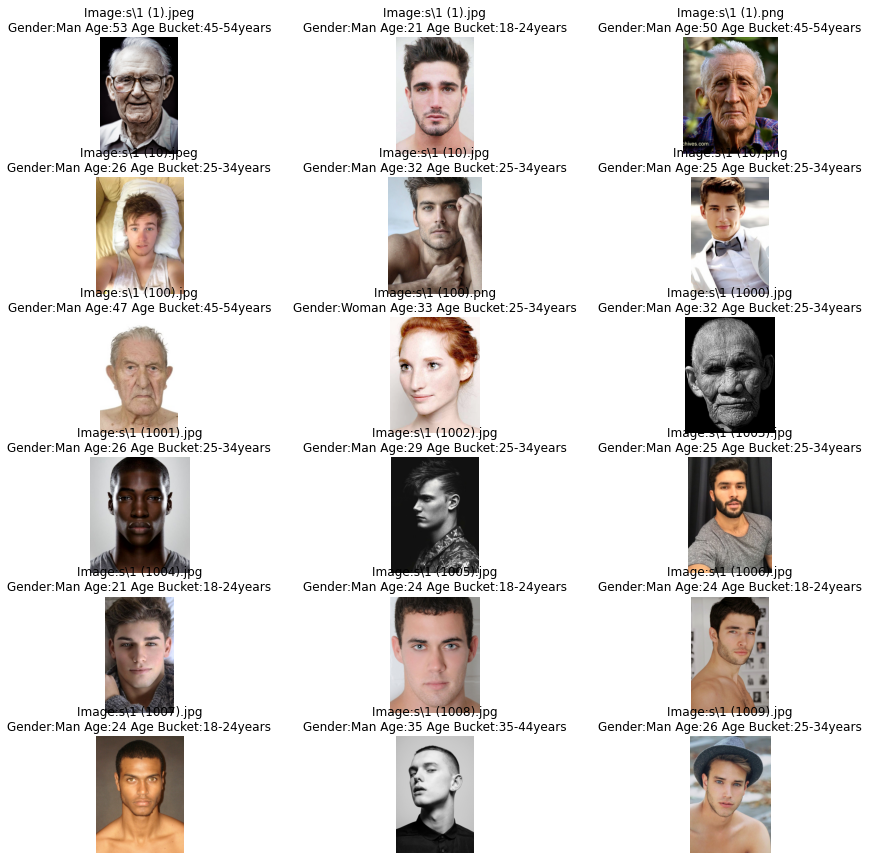

In [39]:
# create figure
fig = plt.figure(figsize=(15, 15))
img_path = "./Humans/*"
# setting values to rows and column variables
rows = 6
columns = 3


for i in range(18):
    image=glob.glob(img_path)[i]
    img_arr=cv2.imread(image)
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, i+1)
    # showing image
    plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image:"+glob.glob(img_path)[i][7:]+"\n"+"Gender:"
                      +img_list[i][glob.glob(img_path)[i][7:]][0]+" "
                      +"Age:"+str(img_list[i][glob.glob(img_path)[i][7:]][1])+" "
                      +"Age Bucket:"+img_list[i][glob.glob(img_path)[i][7:]][2])

In [10]:
### There are certian images of older generation humans whcich the model fails to predict the Gender and Age.For example Image (0,0), Image(0,2).